TP4 : Ligne de partae des eaux

In [35]:
### imports ###
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import prewitt

I.                    Estimation de gradient

In [36]:
def toGray(image : np.ndarray) :
    gray_image = (image[:,:,1] + image[:,:,2] + image[:,:,3])/3
    return gray_image

def gradient(image : np.ndarray) :
    grad = abs(convolve2d(in1=image, in2=np.matrix([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]), mode='same')) + abs(convolve2d(in1=image, in2=np.matrix([[1, 0, -1], [1, 0, -1], [1, 0, -1]]), mode='same'))
    return grad 

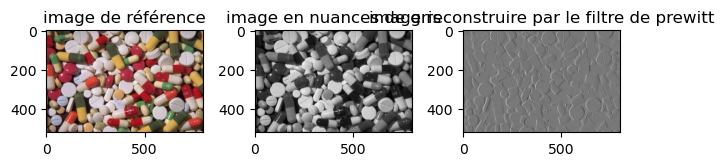

In [39]:
image = plt.imread('image.png')

gray_image = toGray(image=image)

grad = gradient(gray_image)

res = prewitt(gray_image)

plt.subplot(1,3,1)
plt.imshow(image)
plt.title("image de référence")
plt.subplot(1,3,2)
plt.imshow(gray_image, cmap= 'gray')
plt.title("image en nuances de gris")
plt.subplot(1,3,3)
plt.imshow(res, cmap= 'gray')
plt.title("image reconstruire par le filtre de prewitt")
plt.tight_layout()
plt.show()

II.                 Ligne de partage des eaux


In [48]:
def partage_des_eaux(image : np.ndarray) :
    grad = gradient(image)
    labels = np.ones((np.shape(image)[0]+2,np.shape(image)[1]+2))
    nbLabel = 2
        # 0 -> ligne de partage des eaux
        # 1 -> non traité
        # 2 + -> numéro de zone
    for N in range (0,255) :
        x,y,z = np.argwhere(grad == N)
        v = np.reshape(labels[x:x+2,y:y+2],1,[])
        v = np.sum(np.unique([v[1:4],v[6:9]])>1)
        if (v == 0) :
            #si aucun voisins 
            nbLabel += 1
            labels[x,y,z] = nbLabel
        if (v == 1):
            #si il n'y a qu'une seule couleur d'eau qui arrive
            for lab in v :
                if (lab != 0) and (lab != 1) :
                    labels[x,y,z] = lab
        else :
            #si on as plusieurs couleurs
            labels[x,y,z] = 0



In [49]:
PdE = partage_des_eaux(image)

plt.subplot(1,2,1)
plt.imshow(image)
plt.title("image de référence")
plt.subplot(1,2,2)
plt.imshow(PdE)
plt.title("image en partage des eaux")
plt.tight_layout()
plt.show()

ValueError: convolve2d inputs must both be 2-D arrays